<a href="https://colab.research.google.com/github/plapenamanero/trumao_2021/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook for data analysis and figure creation for the paper:

**Experimental investigation on the influence of oven drying on volcanic ash derived soils geotecthnical properties**

Authors:

* Romero-Mancilla, Pablo Eduardo
* Montenegro-Cooper, José Miguel
* King, Robert
* Lapeña-Mañero, Pablo*
* García-Casuso, Carmen

The notebook was created using Google Colab, but it should run on any Jupyter notebook installation with the appropiate packages installed. The following packages are used:

*   Pandas (1.1.5)
*   NumPy (1.19.5)
*   Matplotlib (3.2.2)
*   SciPy (1.4.1) 

CONTACT:

*plapenamanero@gmail.com




# Setup

In [ ]:
#@title Configuration 
# Form option only vailable in Colab
#@markdown Options
# generate pdf for figures?
generate_pdf = True #@param {type: 'boolean'}
# generate zip file with all figures
generate_zip = True #@param {type: 'boolean'}

#@markdown for further configuration see code

# removes sample_data default_folder
!rm -rf sample_data

# neccesary imports fromm standard library
import os
import shutil
import math
from collections import OrderedDict
import requests
import urllib.request
from urllib.parse import urlparse
import json


# additional package import
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, ticker as mticker, colors as mcolors
import matplotlib
from scipy import stats
from google.colab import drive
from IPython.display import Image

#figure size configuratios
cm = 1/2.54
large_fig = (17*cm, 11.5*cm)
medium_fig = (13.8*cm, 9*cm)
small_fig = (6.77*cm, 6.77*cm)

# figure font size configuration
font = {'size'   : 7}
matplotlib.rc('font', **font)

# removes pdfs from main folder
file_list = [f for f in os.listdir('.') if os.path.isfile(f)]
for file in file_list:
    if os.path.splitext(file)[1] == '.pdf':
        os.remove(file)

# folder to save figures
save_folder = 'figures'
# removes folder and its contents if already exists
shutil.rmtree(save_folder, ignore_errors=True)
# creates de folder
os.mkdir(save_folder)
# stores de path to save pdfs
current_path = os.getcwd()
save_path = os.path.join(current_path, save_folder)
# stores the zip name
save_zip = save_folder + '.zip'
# removes the zip if already existis
! rm -rf $save_zip

# Loads file_list from Github
github_repo = 'https://github.com/plapenamanero/trumao_2021/raw/main/'
github_repo_res = github_repo +  'resources/'
github_repo_fl = github_repo_res + 'git_hub_files.json'
with urllib.request.urlopen(github_repo_fl) as url:
    file_list = json.loads(url.read().decode())

# Loads data file
data = pd.ExcelFile(file_list['excel_file'])
del file_list['excel_file']

# Loads figures from Github
for figure_name, figure_url in file_list.items():
    raw_data = requests.get(figure_url)
    url = urlparse(figure_url)
    output_path = os.path.join(save_path, os.path.basename(url.path))
    with open(output_path, 'wb') as output:
        output.write(raw_data.content)

print('Ready')

# Figure 1: Location

Figure not created in Python

In [ ]:
print('\n--- Figure preview ---\n')
url = urlparse(file_list['figure_01'])
image_path = os.path.join(save_path, os.path.basename(url.path))
Image(filename = image_path, width='600') 

# Figure 2: Unit photo

Figure not created in Python

In [ ]:
print('\n--- Figure preview ---\n')
print('\nFigure 2(a)\n')
url = urlparse(file_list['figure_02_a'])
image_path = os.path.join(save_path, os.path.basename(url.path))
display(Image(filename = image_path, width='600') )

print('\nFigure 2(b)\n')
url = urlparse(file_list['figure_02_b'])
image_path = os.path.join(save_path, os.path.basename(url.path))
display(Image(filename = image_path, width='600') )

# Figure 3: Casagrande apparatus results

In [ ]:
# figure configuration
figure_name = 'figure_03.pdf'
figure_path = os.path.join(save_path, figure_name)
fig, ax = plt.subplots(figsize=medium_fig)

# gets classification data from file
cg_data = pd.read_excel(data, 'casagrande')
# splits data on oven¡dried (a) and undisturbed (u)
cg_data_a = cg_data[cg_data['type'] == 'a']
cg_data_u = cg_data[cg_data['type'] == 'u']

# plots results for undisturbed samples
ax.scatter(cg_data_u['hits'], cg_data_u['w'],
           label = 'Oven-dried',
           marker='o',
           facecolors='white',
           edgecolors='k',
           color = 'k')

# plots results for oven dried samples
ax.scatter(cg_data_a['hits'], cg_data_a['w'],
           label='Undisturbed',
           marker='^',
           facecolors='white',
           edgecolors='k',
           color = 'k')

# Regressions
# Undisturbed
extra = 5
reg_u = stats.linregress(np.log10(cg_data_u['hits']), cg_data_u['w'])
plot_reg_u_hits = [min(cg_data_u['hits']) - 1.5, max(cg_data_u['hits']) + extra]
plot_reg_u_w = [reg_u.intercept + min(np.log10(cg_data_u['hits'])) * reg_u.slope,
                  reg_u.intercept + max(np.log10(cg_data_u['hits'])) * reg_u.slope]
ax.plot(plot_reg_u_hits, plot_reg_u_w,'--r',label='Undisturbed flow curve')
wl_u = reg_u.slope * (np.log10(25)) + reg_u.intercept
print('\n--- Undisturbed fit ---')
print('w = {}*log(hits) + {}'.format(reg_u.slope, reg_u.intercept))
print('wl = {}'.format(round(wl_u,0)))
print('R^2: {}'.format(reg_u.rvalue**2))

# Oven dried
extra = 5
reg_a = stats.linregress(np.log10(cg_data_a['hits']), cg_data_a['w'])
plot_reg_a_hits = [min(cg_data_a['hits']) - 1.5, max(cg_data_a['hits']) + extra]
plot_reg_a_w = [reg_a.intercept + min(np.log10(cg_data_a['hits'])) * reg_a.slope,
                  reg_a.intercept + max(np.log10(cg_data_a['hits'])) * reg_a.slope]
ax.plot(plot_reg_a_hits, plot_reg_a_w,'--b', label='Oven-dried flow curve')
wl_a = reg_a.slope * (np.log10(25)) + reg_a.intercept
print('\n--- Oven-dried fit ---')
print('w = {}*log(hits) + {}'.format(reg_a.slope, reg_a.intercept))
print('wl = {}'.format(round(wl_a, 0)))
print('R^2: {}'.format(reg_a.rvalue**2))

# Configures figure aspect
ax.set(xlim = [10,50],
       ylim = [0, 140],
       xscale = 'log',
       ylabel='Water content, w $(\%)$',
       xlabel='Number of hits',
       xticks=[10, 20, 25, 30, 40, 50])

plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
# shows major and minor grids
ax.xaxis.set_minor_formatter(mticker.ScalarFormatter())
ax.grid(which='major', linewidth=0.3)
ax.grid(which='minor', linewidth=0.3)
# shows legend
ax.legend(loc='lower right')

if generate_pdf:
    fig.savefig(figure_path)
    print('\n--- Figure saved to pdf on {} ---'.format(figure_path))
else:
    print('\n--- PDF saving deactivated ---'.format(figure_path))
    
print('\n--- Figure preview ---\n')
fig.show()

# Figure 4: Boxplot cone results

In [ ]:
# figure configuration
figure_name = 'figure_04.pdf'
figure_path = os.path.join(save_path, figure_name)
fig, ax = plt.subplots(1, 2, figsize=medium_fig)

# gets classification data from file
cone_data = pd.read_excel(data, 'cone')
# splits data in undisturbed and oven dried
cone_data_u = cone_data[cone_data['type'] == 'u']
cone_data_a = cone_data[cone_data['type'] == 'a']

# Undisturved samples
sample_u_list = cone_data_u['sample'].unique()
data_u = []
plot_data_u = []
w_c_u = []
for sample in sample_u_list:
    pen = cone_data_u[cone_data_u['sample'] == sample]['penetration']
    w_c_u.append(int(np.round(cone_data_u[cone_data_u['sample'] == sample]['w'].unique(), decimals=0)))
    plot_data_u.append(pen)
plot_data_u = np.array(plot_data_u, dtype=object)   
ax[0].boxplot(plot_data_u, zorder=100)

# Ovendried samples
sample_a_list = cone_data_a['sample'].unique()
plot_data_a = []
w_c_a = []
for sample in sample_a_list:
    pen = cone_data_a[cone_data_a['sample'] == sample]['penetration']
    w_c_a.append(int(np.round(cone_data_a[cone_data_a['sample'] == sample]['w'].unique(), decimals=0)))
    plot_data_a.append(pen)
plot_data_a = np.array(plot_data_a, dtype=object)    
ax[1].boxplot(plot_data_a, zorder=100)


# configures undisturbed axes
ax[0].set(ylim = [125, 325],
          title='Undisturbed',
          ylabel = 'Penetration (mm)',
          xlabel = 'Water content, $w$ ($\%$)\n(a)',
          xticklabels = w_c_u)

# configures oven dried axes
ax[1].set(ylim = [125, 325],
          title='Oven-dried',
          xlabel='Water content, $w$ ($\%$)\n(b)',
          xticklabels = w_c_a)

# configures figure aspect
ax[0].grid(linewidth=0.3)
ax[1].grid(linewidth=0.3)
plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)

if generate_pdf:
    fig.savefig(figure_path)
    print('\n--- Figure saved to pdf on {} ---'.format(figure_path))
else:
    print('\n--- PDF saving deactivated ---'.format(figure_path))

print('\n--- Figure preview ---\n')
fig.show()

# Figure 5: Cone fall aparatus results

In [ ]:
# figure configuration
figure_name = 'figure_05.pdf'
figure_path = os.path.join(save_path, figure_name)
fig, ax = plt.subplots(figsize=medium_fig)

# gets classification data from file
cone_data = pd.read_excel(data, 'cone')
# splits data in undisturbed and oven dried
cone_data_u = cone_data[cone_data['type'] == 'u']
cone_data_a = cone_data[cone_data['type'] == 'a']

# Undisturbed samples 
pen_data_u = []
w_data_u = []
sample_u_list = cone_data_u['sample'].unique()
for sample in sample_u_list:
    pen = (cone_data_u[cone_data_u['sample'] == sample]['penetration']) / 10
    w = cone_data_u[cone_data_u['sample'] == sample]['w'].mean()
    pen_data_u.append(np.mean(pen))
    w_data_u.append(w)

ax.scatter(pen_data_u, w_data_u,
           label='Undisturbed',
           marker='^',
           facecolors='white',
           edgecolors='k',
           color = 'k')

# Oven dried samples
pen_data_a = []
w_data_a = []
sample_a_list = cone_data_a['sample'].unique()
for sample in sample_a_list:
    pen = (cone_data_a[cone_data_a['sample'] == sample]['penetration']) / 10
    w = cone_data_a[cone_data_a['sample'] == sample]['w'].mean()
    pen_data_a.append(np.mean(pen))
    w_data_a.append(w)

ax.scatter(pen_data_a, w_data_a,
           label='Oven-dried',
           marker='o',
           facecolors='white',
           edgecolors='k',
           color = 'k')

# Regressions
# Unaltered
extra = 1
reg_u = stats.linregress(pen_data_u, w_data_u)
plot_reg_u_pen = [min(pen_data_u) - extra, max(pen_data_u) + extra]
plot_reg_u_w = [reg_u.intercept + min(pen_data_u) * reg_u.slope,
                  reg_u.intercept + max(pen_data_u) * reg_u.slope]
ax.plot(plot_reg_u_pen, plot_reg_u_w, '--r', label='Undisturbed flow curve')
wl_u = reg_u.slope * (20) + reg_u.intercept

print('\n--- Undisturbed fit ---')
print('w = {}*penetration + {}'.format(reg_u.slope, reg_u.intercept))
print('wl = {}'.format(round(wl_u, 0)))
print('R^2 (undisturbed): {}'.format(reg_u.rvalue**2))

# Oven dried
extra = 1
reg_a = stats.linregress(pen_data_a, w_data_a)
plot_reg_a_pen = [min(pen_data_a) - extra, max(pen_data_a) + extra]
plot_reg_a_w = [reg_a.intercept + min(pen_data_a) * reg_a.slope,
                  reg_a.intercept + max(pen_data_a) * reg_a.slope]
ax.plot(plot_reg_a_pen, plot_reg_a_w,'--b', label='Oven-dried flow curve')
wl_a = reg_u.slope * (20) + reg_a.intercept

print('\n--- Oven dried fit ---')
print('w = {}*penetration + {}'.format(reg_a.slope, reg_a.intercept))
print('wl = {}'.format(round(wl_a, 0)))
print('R^2 (undisturbed): {}'.format(reg_a.rvalue**2))

# configures figure aspect
ax.grid(linewidth=0.3)
ax.set(xlim = [14, 28],
       ylim = [0,150],
       xlabel = 'Penetration $(mm)$',
       ylabel = 'Water content, $w$ $(\%)$')
plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
ax.legend(loc='lower right')

if generate_pdf:
    fig.savefig(figure_path)
    print('\n--- Figure saved to pdf on {} ---'.format(figure_path))
else:
    print('\n--- PDF saving deactivated ---'.format(figure_path))

print('\n--- Figure preview ---\n')
fig.show()

# Figure 6: Plastic limit results

In [ ]:
# figure configuration
figure_name = 'figure_06.pdf'
figure_path = os.path.join(save_path, figure_name)
fig, ax = plt.subplots(figsize=medium_fig)

# gets classification data from file
wd_data = pd.read_excel(data, 'wp')
# splits data in undisturbed and oven dried
wd_data_u = wd_data[wd_data['type'] == 'u']['wP']
wd_data_a = wd_data[wd_data['type'] == 'a']['wP']

print('--- Plastic limit ---')
print('Undisturbed sample -> wp = {}'.format(np.round(np.mean(wd_data_u),
                                                      decimals = 0)))
print('Oven-dried sample -> wp = {}'.format(np.round(np.mean(wd_data_a),
                                                     decimals = 0)))

# plots bosplots
data_plot = np.array([wd_data_u, wd_data_a], dtype=object)
ax.boxplot(data_plot)

# configures figure aspect
ax.grid(linewidth=0.3)
ax.set(ylabel = 'Water content, $w$ $(\%)$',
       xticklabels=['Undisturbed', 'Oven-dried'], ylim = [40, 90])
plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)

if generate_pdf:
    fig.savefig(figure_path)
    print('\n--- Figure saved to pdf on {} ---'.format(figure_path))
else:
    print('\n--- PDF saving deactivated ---'.format(figure_path))

print('\n--- Figure preview ---\n')
fig.show()

# Figure 7: Plasticity chart

In [ ]:
# figure configuration
figure_name = 'figure_07.pdf'
figure_path = os.path.join(save_path, figure_name)
fig, ax = plt.subplots(figsize=large_fig)

# gets classification data from file
classification_data = pd.read_excel(data, 'Classification')
# calculates plasticity index for all samples
classification_data['pi_u'] = classification_data['wl_u'] - classification_data['wp_u']
classification_data['pi_a'] = classification_data['wl_a'] - classification_data['wp_a']

# Author lists
study_list = ['This study (Cone fall)', 'This study (Casagrande)']
international_author_list = ['Lizcano et al (2006)', 'Moore and Styles (1988)',
                             'Knight (1986)']
chilean_author_list = ['Verdugo & Paredes (2004)', 'Paredes (2005)',
                       'Verdugo (2008)', 'González (2012)']
author_list = study_list + international_author_list + chilean_author_list
# Color list
color_list = list(mcolors.TABLEAU_COLORS)[0:len(author_list)]
# Color dictionary
color_zip = zip(author_list, color_list)
color_dict = dict(color_zip)
# Symbol dictionary
symbol_dict = {'International':"x",
               'Chilean undisturbed': 'o',
               'Chilean oven-dried':'^'}
               
def plot_unaltered(order=100):
    '''Plots chilean undisturbed data on plasticity charts.'''

    symbol = symbol_dict['Chilean undisturbed']
    # unaltered results for this study
    for test_u in study_list:
        wl_u = classification_data[classification_data['Author'] == test_u]['wl_u']
        pi_u = classification_data[classification_data['Author'] == test_u]['pi_u']
        ax.scatter(wl_u, pi_u, marker=symbol, facecolors='none',
                   edgecolors=color_dict[test_u],
                   zorder=order)      

    # chilean reported values
    for author in chilean_author_list:
        wl_u = classification_data[classification_data['Author'] == author]['wl_u']
        pi_u = classification_data[classification_data['Author'] == author]['pi_u']
        ax.scatter(wl_u, pi_u,
                   marker=symbol,
                   facecolors='none',
                   edgecolors=color_dict[author],
                   zorder=order)
        
def plot_international(order=100):
    '''Plots international data on plasticity charts.'''

    symbol = symbol_dict['International']  
    # international reported values
    for author in international_author_list:
        wl_u = classification_data[classification_data['Author'] == author]['wl_u']
        pi_u = classification_data[classification_data['Author'] == author]['pi_u']
        ax.scatter(wl_u, pi_u,
                   marker=symbol,
                   facecolors=color_dict[author],
                   zorder=order)

def plot_altered(order=100):
    '''Plots chilean oven-dried data on plasticity charts.'''

    symbol = symbol_dict['Chilean oven-dried']
    # oven dried results for this study
    for test_a in study_list:
        wl_a = classification_data[classification_data['Author'] == test_a]['wl_a']
        pi_a = classification_data[classification_data['Author'] == test_a]['pi_a']
        ax.scatter(wl_a, pi_a,
                   marker=symbol,
                   facecolors='none',
                   edgecolors=color_dict[test_a],
                   zorder=order)
    # oven dried chilean reported values
    for author in chilean_author_list:
        wl_a = classification_data[classification_data['Author'] == author]['wl_a']
        pi_a = classification_data[classification_data['Author'] == author]['pi_a']
        ax.scatter(wl_a, pi_a,
                   marker=symbol,
                   facecolors='none',
                   edgecolors=color_dict[author],
                   zorder=order)

def plot_adjust(order=500):
    '''Plots adjust comparing oven dried and undisturbed.'''

    for test in study_list:
        wl_u = classification_data[classification_data['Author'] == test]['wl_u']
        pi_u = classification_data[classification_data['Author'] == test]['pi_u']

        wl_a = classification_data[classification_data['Author'] == test]['wl_a']
        pi_a = classification_data[classification_data['Author'] == test]['pi_a']

        x_plot = [wl_a, wl_u]
        y_plot = [pi_a, pi_u]

        ax.plot(x_plot, y_plot, ':',
                color='tab:gray',
                zorder=order,
                linewidth=1)

    for author in chilean_author_list:
        wl_a = classification_data[classification_data['Author'] == author]['wl_a']
        pi_a = classification_data[classification_data['Author'] == author]['pi_a']
        wl_u = classification_data[classification_data['Author'] == author]['wl_u']
        pi_u = classification_data[classification_data['Author'] == author]['pi_u']
        
        x_plot = [wl_a, wl_u]
        y_plot = [pi_a, pi_u]

        ax.plot(x_plot, y_plot, ':',
                color='tab:gray',
                zorder=order,
                linewidth=1)

def add_color_legend(order=1000):
    '''Creates color legend.'''

    plot_list = []
    for key in color_dict:
        key_legend = key.replace(' and ', ' & ')
        plot = ax.scatter(-100, -100,
                          marker='s',
                          facecolors=color_dict[key],
                          label=key_legend)
        
        plot_list.append(plot)

    color_legend = ax.legend(loc='upper left',
                             shadow=False,
                             fontsize='x-small',
                             handles=plot_list)
    
    color_legend.get_frame().set_alpha(None)
    ax.add_artist(color_legend).set_zorder(order)  

def add_symbol_legend(order=1000):
    '''Creates symbol legend.'''

    plot_list = []
    for key in symbol_dict:
        if key == 'International':
            plot = ax.scatter(-100, -100,
                              facecolors='k',
                              marker=symbol_dict[key],
                              label=key)
        else:
            plot = ax.scatter(-100, -100,
                              facecolors='none',
                              edgecolors='k',
                              marker=symbol_dict[key],
                              label=key)
            
        plot_list.append(plot)

    symbol_legend = ax.legend(loc='lower right',
                              shadow=False,
                              fontsize='x-small',
                              handles=plot_list)
    
    symbol_legend.get_frame().set_alpha(None)
    ax.add_artist(symbol_legend).set_zorder(order)    

def add_casagrande_chart(max_wl, max_pi, axis, colors=['k', 'r'], order=10, width=1):
    '''Add Casagrande plasticity chat to axis.'''

    # a line
    x_0 = [0, 30]
    y_0 = [8, 8]
    axis.plot(x_0, y_0, colors[0], zorder=order, linewidth = width)
    x_1 = [0, 25, max_wl]
    y_1 = [3.85, 3.85, 0.73*(max_wl - 20)]
    axis.plot(x_1, y_1, colors[0], zorder=order, linewidth = width)

    # 50% moisture line
    x_3 = [50, 50]
    y_3 = [0, max_pi]
    axis.plot(x_3, y_3, colors[1], zorder=order, linewidth = width)

def add_wesley(axis, colors, order = 5):
    '''Add Wesley (1973) data to plasticity chart.'''

    plot_list = []
    andosols_x = [80, 80, 250, 250, 80]
    andosols_y = [17, 32, 83, 33, 17]
    plot, = axis.plot(andosols_x, andosols_y, '--',
                      zorder=order,
                      label='Andosols (Wesley, 1973)',
                      color = colors[0])
    plot_list.append(plot)

    latosols_x = [60, 60, 120, 120, 60]
    latosols_y = [11, 35, 78, 53, 11]
    plot, = axis.plot(latosols_x, latosols_y, '--',
                      zorder=order,
                      label='Latosols (Wesley, 1973)',
                      color = colors[1])
    plot_list.append(plot)
      
    wesley_legend = axis.legend(loc='upper right',
                              shadow=False,
                              fontsize='x-small',
                              handles=plot_list)
    
    wesley_legend.get_frame().set_alpha(None)
    axis.add_artist(wesley_legend).set_zorder(order)    

# defines axis limits
max_wl = 300
max_pi = 160

# adds Casagrande plasticity chart to axis
add_casagrande_chart(max_wl, max_pi, ax)
# plots data on axis
plot_unaltered()
plot_altered()
plot_international()
plot_adjust()
add_wesley(ax, colors = ['r', 'k'], order = 500)
# adds legends
add_color_legend()
add_symbol_legend()
# adds a line text
# text_angle = math.degrees(math.atan(0.77)) + 7 
# ax.text(125, 83, 'A line', rotation=text_angle)

# configures figure aspect
ax.grid(linewidth=0.3)
plt.xlim([0, max_wl])
plt.ylim([0, max_pi])
plt.xlabel(r'Liquid limit, $w_L$ (%)')
plt.ylabel(r'Plasticity Index, $PI$ (%)') 
plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)

if generate_pdf:
    fig.savefig(figure_path)
    print('\n--- Figure saved to pdf on {} ---'.format(figure_path))
else:
    print('\n--- PDF saving deactivated ---'.format(figure_path))

print('\n--- Figure preview ---\n')
fig.show()

# Figure 8: Modified Proctor


--- Figure saved to pdf on /content/figures/figure_08.pdf ---

--- Figure preview ---



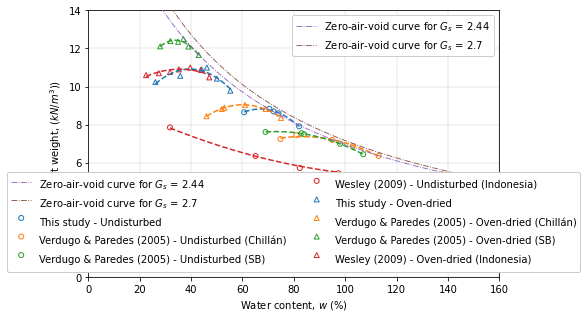

In [ ]:
# figure configuration
figure_name = 'figure_08.pdf'
figure_path = os.path.join(save_path, figure_name)
fig, ax = plt.subplots(figsize=large_fig)

# gets Modified Proctor data from file
proctor_data = pd.read_excel(data, 'Proctor')
# gets the names of the studies
altered_proctor_list = proctor_data[proctor_data['type'] == 'a']['study'].unique()
unaltered_proctor_list = proctor_data[proctor_data['type'] == 'u']['study'].unique()

def add_saturation_line(g_s, max_w, max_gamma_d, order = 500):
    '''Adds saturation line (Sr = 1) for a given value of  g_s to axis.'''

    gamma_w = 9.81
    gamma_s = g_s * 10
    w = np.linspace(0, max_w, 100)
    gamma_d = gamma_s / (1 + (gamma_s * (w / 100))/(gamma_w))
    saturation_plot = ax.plot(w, gamma_d, 'k',
                              zorder = order,
                              label='Saturation line for $G_s$ = {}'.format(g_s))
    
    saturation = ax.legend(loc='upper right',
                             shadow=False,
                             fontsize='medium',
                             handles=saturation_plot)
    
    saturation.get_frame().set_alpha(None)
    ax.add_artist(saturation).set_zorder(order)

def add_multiple_saturation_lines(g_s_list, max_w, max_gamma_d, colors, order = 500):
    '''Adds multiple saturation lines (Sr = 1) for a given list of g_s to axis.'''
    gamma_w = 9.81
    gamma_s_list = [g_s * gamma_w for g_s in g_s_list]

    w = np.linspace(0, max_w, 100)
    
    gamma_d_list = [gamma_s / (1 + (gamma_s * (w / 100))/(gamma_w)) for gamma_s in gamma_s_list]

    saturation_plot_list = []

    for i, gamma_d in enumerate(gamma_d_list):
        if len(colors) < 1:
            colors = list(mcolors.TABLEAU_COLORS)
            
        plot, = ax.plot(w, gamma_d, '-.', color = colors.pop(0),
                        linewidth = 0.9,
                        zorder = order,
                        label='Zero-air-void curve for $G_s$ = {}'.format(g_s_list[i]))
        
        saturation_plot_list.append(plot)

    saturation = ax.legend(loc='upper right',
                            shadow=False,
                            fontsize='medium',
                            handles=saturation_plot_list)
        
    saturation.get_frame().set_alpha(None)

    ax.add_artist(saturation).set_zorder(order)


def plot_proctor(w, gamma_d, marker, color, label, order=400):
    '''Plots proctor test.'''

    label = label.replace('Unaltered', 'Undisturbed')
    label = label.replace('Oven Dried', 'Oven-dried')
    label = label.replace('Oven dried', 'Oven-dried')
    label = label.replace(' y ', ' & ')
    ax.scatter(w, gamma_d,
               marker=marker,
               facecolors='none',
               edgecolors=color,
               zorder=order-100,
               label=label,
               s=25)
    model = np.poly1d(np.polyfit(w, gamma_d, 2))
    x_model = np.linspace(min(w), max(w), 100)
    y_model = model(x_model)
    plt.plot(x_model, y_model, '--', color=color, zorder=order)

# configure g_s and axis limits
g_s = 2.7
max_w = 160
max_gamma_d = 14

# plots undisturbed tests
color_list = list(mcolors.TABLEAU_COLORS)
for i, test in enumerate(unaltered_proctor_list):
    gamma_d = proctor_data[proctor_data['study'] == test]['gamma_d']
    w = proctor_data[proctor_data['study'] == test]['w']
    if len(color_list) > 0:
        color = color_list.pop(0)
    else:
        color_list = list(mcolors.TABLEAU_COLORS)
        color = color_list.pop(0)
    plot_proctor(w, gamma_d, 'o', color, test)

# plots oven dried tests
color_list = list(mcolors.TABLEAU_COLORS)
for i, test in enumerate(altered_proctor_list):
    gamma_d = proctor_data[proctor_data['study'] == test]['gamma_d']
    w = proctor_data[proctor_data['study'] == test]['w']
    if len(color_list) > 0:
        color = color_list.pop(0)
    else:
        color_list = list(mcolors.TABLEAU_COLORS)
        color = color_list.pop(0)
    plot_proctor(w, gamma_d, '^', color, test)

# adds saturation line(s)
#add_saturation_line(g_s, max_w, max_gamma_d)
add_multiple_saturation_lines([2.44, g_s], max_w, max_gamma_d, colors = color_list)

# add legend
legend = plt.legend(fontsize='medium',
                    ncol=2,handleheight=2.4,
                    labelspacing=0.05,
                    loc='lower center')
legend.get_frame().set_alpha(None)
ax.add_artist(legend).set_zorder(500)

# configures figure aspect
ax.grid(linewidth=0.3)
plt.xlim([0, max_w])
plt.ylim([0, max_gamma_d])
plt.xlabel(r'Water content, $w$ (%)')
plt.ylabel(r'Dry unit weight, $(kN/m^3))$')
plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)

if generate_pdf:
    fig.savefig(figure_path)
    print('\n--- Figure saved to pdf on {} ---'.format(figure_path))
else:
    print('\n--- PDF saving deactivated ---'.format(figure_path))

print('\n--- Figure preview ---\n')
fig.show()

# Figure 9: CBR


--- Figure saved to pdf on /content/figures/figure_10.pdf ---

--- Figure preview ---



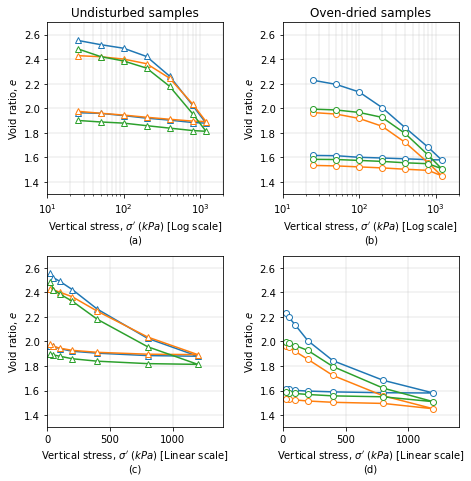

In [ ]:
# figure configuration
figure_name = 'figure_10.pdf'
figure_path = os.path.join(save_path, figure_name)
fig_size = [a*b for a,b in zip((1, 3/2),large_fig)]
fig, ax = plt.subplots(2, 2, figsize=fig_size)


# gets oedomeer data samples from file
oed_data = pd.read_excel(data, 'oedometer')
# splits data in undisturbed and oven dried
oed_data_u = pd.DataFrame(oed_data[oed_data['type'] == 'u'])
sample_list_u = oed_data_u['sample'].unique()
oed_data_a = pd.DataFrame(oed_data[oed_data['type'] == 'a'])
sample_list_a = oed_data_a['sample'].unique()

# plots undisturbed results
for sample in sample_list_u:
    sigma = oed_data_u[oed_data_u['sample'] == sample]['stress']
    e = oed_data_u[oed_data_u['sample'] == sample]['e']
    ax[0][0].plot(sigma, e,
            marker = '^',
            markerfacecolor='white',
            label='Undisturbed')
    ax[1][0].plot(sigma, e,
            marker = '^',
            markerfacecolor='white',
            label='Undisturbed')

# plots oven dried results   
for sample in sample_list_a:
    sigma = oed_data_a[oed_data_a['sample'] == sample]['stress']
    e = oed_data_a[oed_data_a['sample'] == sample]['e']
    ax[0][1].plot(sigma, e,
            marker = 'o',
            markerfacecolor='white',
            label='Oven-dried')
    ax[1][1].plot(sigma, e,
            marker = 'o',
            markerfacecolor='white',
            label='Oven-dried')


# configures figure aspect

# grid lines
ax[0][0].grid(which='both', linewidth = 0.3)
ax[1][0].grid(which='both', linewidth = 0.3)
ax[0][1].grid(which='both', linewidth = 0.3)
ax[1][1].grid(which='both', linewidth = 0.3)


ax[0][0].set(xscale = 'log', 
        xlabel = "Vertical stress, $\sigma'$ $(kPa)$ [Log scale]\n(a)",
        ylabel = "Void ratio, $e$",
        title = 'Undisturbed samples',
        xlim = [10, 2000],
        ylim = [1.3, 2.7],
        xticks = [0.1, 1, 10, 100, 10000])

ax[1][0].set(xscale = 'linear', 
        xlabel = "Vertical stress, $\sigma'$ $(kPa)$ [Linear scale]\n(c)",
        ylabel = "Void ratio, $e$",
        xlim = [0, 1400],
        ylim = [1.3, 2.7],
        xticks = [0.1, 1, 10, 100, 10000])

ax[0][1].set(xscale = 'log', 
        xlabel = "Vertical stress, $\sigma'$ $(kPa)$ [Log scale]\n(b)",
        ylabel = "Void ratio, $e$",
        title = 'Oven-dried samples',
        xlim = [10, 2000],
        ylim = [1.3, 2.7],
        xticks = [0.1, 1, 10, 100, 10000])

ax[1][1].set(xscale = 'linear', 
        xlabel = "Vertical stress, $\sigma'$ $(kPa)$ [Linear scale]\n(d)",
        ylabel = "Void ratio, $e$",
        xlim = [0, 1400],
        ylim = [1.3, 2.7],
        xticks = [0.1, 1, 10, 100, 10000])

plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)


if generate_pdf:
    fig.savefig(figure_path)
    print('\n--- Figure saved to pdf on {} ---'.format(figure_path))
else:
    print('\n--- PDF saving deactivated ---'.format(figure_path))

print('\n--- Figure preview ---\n')
fig.show()

# Figure 10: Oedometer


--- Figure saved to pdf on /content/figures/figure_10_alt.pdf ---

--- Figure preview ---



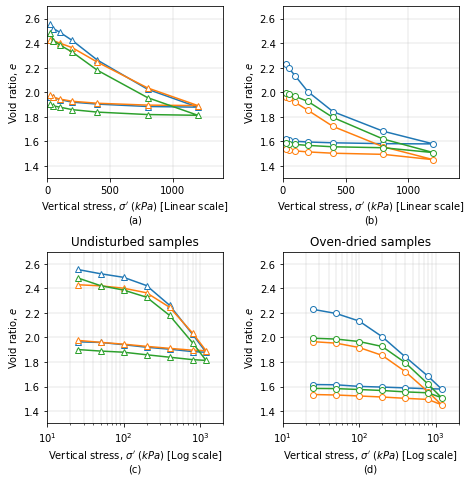

In [ ]:
# figure configuration
figure_name = 'figure_10.pdf'
figure_path = os.path.join(save_path, figure_name)
fig_size = [a*b for a,b in zip((1, 3/2),large_fig)]
fig, ax = plt.subplots(2, 2, figsize=fig_size)


# gets oedomeer data samples from file
oed_data = pd.read_excel(data, 'oedometer')
# splits data in undisturbed and oven dried
oed_data_u = pd.DataFrame(oed_data[oed_data['type'] == 'u'])
sample_list_u = oed_data_u['sample'].unique()
oed_data_a = pd.DataFrame(oed_data[oed_data['type'] == 'a'])
sample_list_a = oed_data_a['sample'].unique()

# plots undisturbed results
for sample in sample_list_u:
    sigma = oed_data_u[oed_data_u['sample'] == sample]['stress']
    e = oed_data_u[oed_data_u['sample'] == sample]['e']
    ax[1][0].plot(sigma, e,
            marker = '^',
            markerfacecolor='white',
            label='Undisturbed')
    ax[0][0].plot(sigma, e,
            marker = '^',
            markerfacecolor='white',
            label='Undisturbed')

# plots oven dried results   
for sample in sample_list_a:
    sigma = oed_data_a[oed_data_a['sample'] == sample]['stress']
    e = oed_data_a[oed_data_a['sample'] == sample]['e']
    ax[1][1].plot(sigma, e,
            marker = 'o',
            markerfacecolor='white',
            label='Oven-dried')
    ax[0][1].plot(sigma, e,
            marker = 'o',
            markerfacecolor='white',
            label='Oven-dried')


# configures figure aspect

# grid lines
ax[0][0].grid(which='both', linewidth = 0.3)
ax[1][0].grid(which='both', linewidth = 0.3)
ax[0][1].grid(which='both', linewidth = 0.3)
ax[1][1].grid(which='both', linewidth = 0.3)


ax[1][0].set(xscale = 'log', 
        xlabel = "Vertical stress, $\sigma'$ $(kPa)$ [Log scale]\n(c)",
        ylabel = "Void ratio, $e$",
        title = 'Undisturbed samples',
        xlim = [10, 2000],
        ylim = [1.3, 2.7],
        xticks = [0.1, 1, 10, 100, 10000])

ax[0][0].set(xscale = 'linear', 
        xlabel = "Vertical stress, $\sigma'$ $(kPa)$ [Linear scale]\n(a)",
        ylabel = "Void ratio, $e$",
        xlim = [0, 1400],
        ylim = [1.3, 2.7],
        xticks = [0.1, 1, 10, 100, 10000])

ax[1][1].set(xscale = 'log', 
        xlabel = "Vertical stress, $\sigma'$ $(kPa)$ [Log scale]\n(d)",
        ylabel = "Void ratio, $e$",
        title = 'Oven-dried samples',
        xlim = [10, 2000],
        ylim = [1.3, 2.7],
        xticks = [0.1, 1, 10, 100, 10000])

ax[0][1].set(xscale = 'linear', 
        xlabel = "Vertical stress, $\sigma'$ $(kPa)$ [Linear scale]\n(b)",
        ylabel = "Void ratio, $e$",
        xlim = [0, 1400],
        ylim = [1.3, 2.7],
        xticks = [0.1, 1, 10, 100, 10000])

plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)


if generate_pdf:
    fig.savefig(figure_path)
    print('\n--- Figure saved to pdf on {} ---'.format(figure_path))
else:
    print('\n--- PDF saving deactivated ---'.format(figure_path))

print('\n--- Figure preview ---\n')
fig.show()

# Figure 11: Consolidation curves

In [ ]:
# figure configuration
figure_name = 'figure_11.pdf'
figure_path = os.path.join(save_path, figure_name)
#fig_size = [a*b for a,b in zip((1, 2/3),large_fig)]
#fig, ax = plt.subplots(2, 1, figsize=fig_size)

fig, ax = plt.subplots(2, 1, figsize=large_fig)

# gets classification data from file
cv_data = pd.read_excel(data, 'cv')
# splits data on oven¡dried (a) and undisturbed (u)
cv_data_a = cv_data[cv_data['type'] == 'a']
cv_data_u = cv_data[cv_data['type'] == 'u']


# Plots ovendried cv data
for sample in cv_data_a['sample'].unique():
    stress_step = sample.split('.')[0].split('-')
    label = stress_step[0] + '-' + stress_step[1] + ' kPa'
    ax[0].plot(np.sqrt(cv_data_a[cv_data_a['sample'] == sample]['sqrt(t)']), 
               cv_data_a[cv_data_a['sample'] == sample]['%settlement']*100, 
               '^-', label=label, markerfacecolor='white', markersize = 5)
    
# Plots undisturbed cv data
for sample in cv_data_u['sample'].unique():
    stress_step = sample.split('.')[0].split('-')
    label = stress_step[0] + '-' + stress_step[1] + ' kPa'
    ax[1].plot(np.sqrt(cv_data_u[cv_data_u['sample'] == sample]['sqrt(t)']), 
               cv_data_u[cv_data_u['sample'] == sample]['%settlement']*100, 
               'o-', label=label, markerfacecolor='white', markersize = 5)
    


ax[0].set(ylim = [105, 0], xlim = [-0.25, 7],
          title='Oven-dried (a)',
          ylabel = r'% of total step vertical strain')
ax[1].set(ylim = [105, 0], xlim = [-0.25, 7],
          title='Undisturbed (b)',
          ylabel = r'% of total step vertical strain',
          xlabel = r'Square root of time, $\sqrt{t}$, ($\sqrt{min}$)')

ax[0].grid(linewidth=0.3)
ax[1].grid(linewidth=0.3)

ax[0].legend(loc = 'upper right')
ax[1].legend(loc = 'upper right')

fig.tight_layout(pad=0.75)

if generate_pdf:
    fig.savefig(figure_path)
    print('\n--- Figure saved to pdf on {} ---'.format(figure_path))
else:
    print('\n--- PDF saving deactivated ---'.format(figure_path))

print('\n--- Figure preview ---\n')
fig.show()


# Figure 12: UCT box plot results

In [ ]:
# figure configuration
figure_name = 'figure_12.pdf'
figure_path = os.path.join(save_path, figure_name)
fig, ax = plt.subplots(figsize=medium_fig)

# gets classification data from file
uct_data = pd.read_excel(data, 'UCT')
# splits data in undisturbed and oven dried
uct_u = uct_data[uct_data['type'] == 'u']['su']
uct_a = uct_data[uct_data['type'] == 'a']['su']

# Result calculation
print('\n--- Undisturbed ---')
print('Undisturbed mean: {}'.format(np.mean(uct_u)))
print('Undisturbed std: {}'.format(np.std(uct_u)))
print('\n--- Oven dried ---')
print('Oven-dried mean: {}'.format(np.mean(uct_a)))
print('Oven-dried std: {}'.format(np.std(uct_a)))
uct = [uct_u, uct_a]

# plots data
bp = ax.boxplot(uct)
ax.set(xticklabels = ['Undisturbed', 'Oven-dried'],
       ylabel = 'Unconfined shear strength, $s_u$ $(kPa)$',
       ylim = [0,60]) 

# configures figure aspect
ax.grid(linewidth=0.3)
plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)

if generate_pdf:
    fig.savefig(figure_path)
    print('\n--- Figure saved to pdf on {} ---'.format(figure_path))
else:
    print('\n--- PDF saving deactivated ---'.format(figure_path))

print('\n--- Figure preview ---\n')
fig.show()

# Figure 13: Direct Shear curves

In [ ]:
# figure configuration
figure_name = 'figure_13.pdf'
figure_path = os.path.join(save_path, figure_name)
fig_size = [a*b for a,b in zip((1, 3/2),large_fig)]
fig, ax = plt.subplots(2, 2, figsize=fig_size)

# gets direct shear data samples from file
ds_data = pd.read_excel(data, 'ds')
# splits data in undisturbed and oven dried
ds_u_data = pd.DataFrame(ds_data[ds_data['type']== 'u']).dropna()
ds_a_data = pd.DataFrame(ds_data[ds_data['type']== 'a']).dropna()
# gets unique values of sigma
sigma_list_u = ds_u_data['sigma'].unique()
sigma_list_a = ds_a_data['sigma'].unique()

# plots undisturbed results
for sigma in sigma_list_u:
    
    sample_list = ds_u_data[ds_u_data['sigma'] == sigma]['sample'].unique()
    for sample in sample_list:
        shape = ds_u_data[(ds_u_data['sigma'] == sigma) & (ds_u_data['sample'] == sample)]['shape'].unique()
        if shape == 'Cil':
            line = '--'
        else:
            line = '-'
        disp_h =  ds_u_data[(ds_u_data['sigma'] == sigma) & (ds_u_data['sample'] == sample)]['h_def']
        tau =  ds_u_data[(ds_u_data['sigma'] == sigma) & (ds_u_data['sample'] == sample)]['stress']
        disp_v = ds_u_data[(ds_u_data['sigma'] == sigma) & (ds_u_data['sample'] == sample)]['v_def']
        if len(disp_h) > 1:
            ax[0][0].plot(disp_h, tau, line, label='{0:.0f} kPa'.format(round(sigma, 0)))
            ax[1][0].plot(disp_h, disp_v, line, label='{0:.0f} kPa'.format(round(sigma, 0)))

# plots oven dried results
for sigma in sigma_list_a:
    sample_list = ds_a_data[ds_a_data['sigma'] == sigma]['sample'].unique()
    for sample in sample_list:
        disp_h =  ds_a_data[(ds_a_data['sigma'] == sigma) & (ds_a_data['sample'] == sample)]['h_def']
        tau =  ds_a_data[(ds_a_data['sigma'] == sigma) & (ds_a_data['sample'] == sample)]['stress']
        disp_v = ds_a_data[(ds_a_data['sigma'] == sigma) & (ds_a_data['sample'] == sample)]['v_def']
        ax[0][1].plot(disp_h, tau, label='{0:.0f} kPa'.format(round(sigma, 0)))
        ax[1][1].plot(disp_h, disp_v, label='{0:.0f} kPa'.format(round(sigma, 0)))

# shows legends    
ax[1][0].legend(loc='lower center',
                 shadow=False,
                 fontsize='x-small',
                 ncol=4)

ax[1][1].legend(loc='lower center',
                 shadow=False,
                 fontsize='x-small',
                 ncol=4)

# configure figure aspect
ax[0][0].set(title = 'Undisturbed samples',
           ylabel = r'Shear stress, $\tau$ $(kPa)$',
           xlabel = r'Horizontal displacement, $d_h$ $(mm)$'+'\n (a)',
           xlim = [0,22.5],
           ylim = [0, 225])

ax[1][0].set(xlabel = r'Horizontal displacement, $d_h$ $(mm)$'+'\n (b)',
           ylabel = r'Vertical displacement, $d_v$ $(mm)$',
           xlim = [0,22.5],
           ylim = [-4.25, 0.5])

ax[0][1].set(title = 'Oven-dried samples',
              ylabel = r'Shear stress, $\tau$ $(kPa)$',
              xlabel = r'Horizontal displacement, $d_h$ $(mm)$'+'\n (c)',
              xlim = [0,22.5],
              ylim = [0, 225])

ax[1][1].set(xlabel = r'Horizontal displacement, $d_h$ $(mm)$'+'\n (d)',
              ylabel = r'Vertical displacement, $d_v$ $(mm)$',
              xlim = [0,22.5],
              ylim = [-4.25, 0.5])

ax[0][0].grid(linewidth=0.3)
ax[1][0].grid(linewidth=0.3)
ax[0][1].grid(linewidth=0.3)
ax[1][1].grid(linewidth=0.3)

plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)

if generate_pdf:
    fig.savefig(figure_path)
    print('\n--- Figure saved to pdf on {} ---'.format(figure_path))
else:
    print('\n--- PDF saving deactivated ---'.format(figure_path))

print('\n--- Figure preview ---\n')
fig.show()

# Figure 14: Direct shear Mohr plane

In [ ]:
# figure configuration
figure_name = 'figure_14.pdf'
figure_path = os.path.join(save_path, figure_name)
fig, ax = plt.subplots(figsize=medium_fig)

# gets direct shear data samples from file
ds_data = pd.read_excel(data, 'ds')
sample_list = ds_data['sample'].unique()


ds_a_sigma = []
ds_a_tau = []
ds_u_sigma = []
ds_u_tau = []

for sample in sample_list:
    if sample:
        sigma_list = ds_data[ds_data['sample'] == sample]['sigma'].unique()
        for sigma in sigma_list:
            sample_type = ds_data[(ds_data['sample'] == sample) & (ds_data['sigma'] == sigma)]['type'].unique()[0]
            data_plot = ds_data[(ds_data['sample'] == sample) & (ds_data['sigma'] == sigma)]
            tau = max(data_plot['stress'])
            if sample_type == 'u':
                label = 'Undisturbed'
                marker = 'o'
                ds_u_sigma.append(sigma)
                ds_u_tau.append(tau)
            else:
                label = 'Oven-dried'
                marker = '^'
                ds_a_sigma.append(sigma)
                ds_a_tau.append(tau)

            ax.scatter(sigma, tau,
                    marker=marker,
                    facecolors='white',
                    edgecolors = 'k',
                    label=label,
                    color = 'k')
            

ds_a_sigma = np.array(ds_a_sigma)
ds_a_tau = np.array(ds_a_tau)
ds_u_sigma = np.array(ds_u_sigma)
ds_u_tau = np.array(ds_u_tau)

ds_all_sigma = np.append(ds_a_sigma, ds_u_sigma)
ds_all_tau = np.append(ds_a_tau, ds_u_tau)
 

# Regressions
# Unaltered
reg_u = stats.linregress(ds_u_sigma, ds_u_tau)
plot_reg_u_sigma = [min(ds_u_sigma), max(ds_u_sigma)]
plot_reg_u_tau = [reg_u.intercept + min(ds_u_sigma) * reg_u.slope,
                  reg_u.intercept + max(ds_u_sigma) * reg_u.slope]
ax.plot(plot_reg_u_sigma, plot_reg_u_tau,
        '--r',
        label='Undisturbed evelope')
print('\n--- Undisturbed fit ---')
print('Cohesion unaltered: {}'.format(reg_u.intercept))
print('Friction angle unaltered: {}'.format(np.degrees(np.arctan(reg_u.slope))))
print('R^2 (unaltered): {}'.format(reg_u.rvalue**2))

# Oven dried
reg_a = stats.linregress(ds_a_sigma, ds_a_tau)
plot_reg_a_sigma = [min(ds_a_sigma), max(ds_a_sigma)]
plot_reg_a_tau = [reg_a.intercept + min(ds_a_sigma) * reg_a.slope,
                  reg_a.intercept + max(ds_a_sigma) * reg_a.slope]
ax.plot(plot_reg_a_sigma, plot_reg_a_tau,
        '--b',
        label='Oven-dried envelope')
print('\n--- Oven dried fit ---')
print('Cohesion unaltered: {}'.format(reg_a.intercept))
print('Friction angle unaltered: {}'.format(np.degrees(np.arctan(reg_a.slope))))
print('R^2 (oven-dried): {}'.format(reg_a.rvalue**2))



handles, labels = ax.get_legend_handles_labels()
labels.reverse()
handles.reverse()
by_label = OrderedDict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc = 'upper left')

max_tau = 225
max_sigma = 325

ax.grid(linewidth=0.3)
ax.set(xlim = [0, max_sigma],
       ylim = [0, max_tau],
       aspect = 'equal',
       xticks = np.arange(0,max_sigma+1, 25),
       yticks = np.arange(0,max_tau+1, 25),
       xlabel = r'Normal stress, $\sigma$ $(kPa)$',
       ylabel = r'Shear stress, $\tau$, $(kPa)$')

plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)

if generate_pdf:
    fig.savefig(figure_path)
    print('\n--- Figure saved to pdf on {} ---'.format(figure_path))
else:
    print('\n--- PDF saving deactivated ---'.format(figure_path))

print('\n--- Figure preview ---\n')
fig.show()

# Zip figures

In [ ]:
if generate_zip:
    !zip -r $save_zip $save_path

if from_Google_Drive:
    zip_Google_Colab = drive_folder + 'figures.zip'
    ! rm -rf $zip_Google_Colab
    !zip -r $zip_Google_Colab $save_path